In [1]:
pip install pybamm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pybamm
import matplotlib.pyplot as plt

##Single Particle Model

In [3]:
model1 = pybamm.lithium_ion.SPM()

In [28]:
param1 = model1.default_parameter_values

"""
Capacity can only be changed by parameters like electrode width and height. 
According to https://github.com/pybamm-team/PyBaMM/discussions/1635, changing nominal cell capacity cannot effectively change the capacity in solving the model later.
But below, the nominal cell capacity is still changed for reference.
"""
# Electrode width [m], by default 0.207
param1['Electrode width [m]'] = 0.207 / 0.680616 * 3.9
# Nominal cell capacity [A.h], by default 0.680616
param1['Nominal cell capacity [A.h]'] = 4
# Number of cells connected in series to make a battery, by default 1
# 1 / 0.680616 * 350 ~= 515
#param1['Number of cells connected in series to make a battery'] = 515
# Number of electrodes connected in parallel to make a cell, by default 1
# 1 / 0.680616 * 350 ~= 515
#param1['Number of electrodes connected in parallel to make a cell'] = 515


"""
Set the voltage cut-off limits.
"""
# cut_off_lower = 3.1  # V
# cut_off_upper = 4.1  # V
# param1['Lower voltage cut-off [V]'] = cut_off_lower
# param1['Upper voltage cut-off [V]'] = cut_off_upper


"""
Current is an input for each time step
"""
# Current function [A], by default 0.680616
#param1['Current function [A]'] = 24

#print(param1)

'\nCurrent is an input for each time step\n'

In [6]:
sim1 = pybamm.Simulation(model1, parameter_values=param1)

# https://pybamm.readthedocs.io/en/v21.9/source/simulation.html
# 100 points within the interval [t0, tf]
sim1.solve([0, 21600])

interactive(children=(FloatSlider(value=0.0, description='t', max=5.88707572342899, step=0.058870757234289896)…

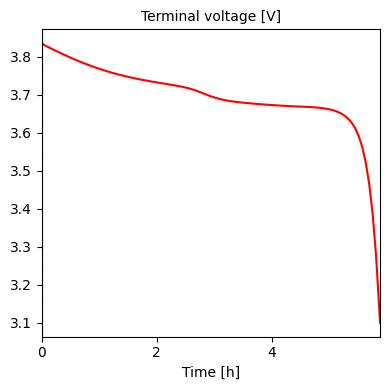

In [7]:
sim1.plot(["Terminal voltage [V]"])

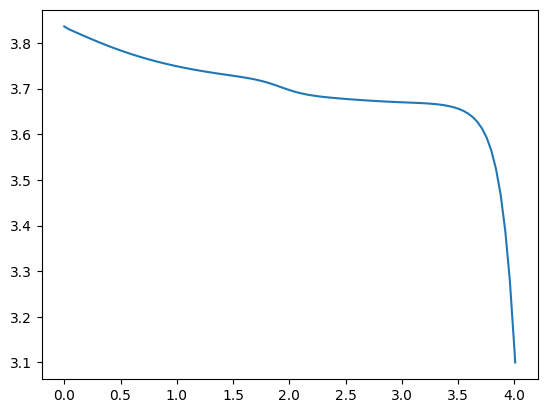

In [8]:
fig, ax = plt.subplots()
solution = sim1.solution

dcap = solution["Discharge capacity [A.h]"].data
V = solution['Terminal voltage [V]'].data
ax.plot(dcap, V)

plt.show()

##Add experiment description

In [9]:
experiment = pybamm.Experiment(
    [
        "Charge at C/5 until 4.1 V",
        "Discharge at C/1 until 3.105 V"
    ] * 1
)

In [10]:
sim = pybamm.Simulation(model1, experiment=experiment, parameter_values=param1)
sim.solve()

interactive(children=(FloatSlider(value=0.0, description='t', max=9.990663118678563, step=0.09990663118678564)…

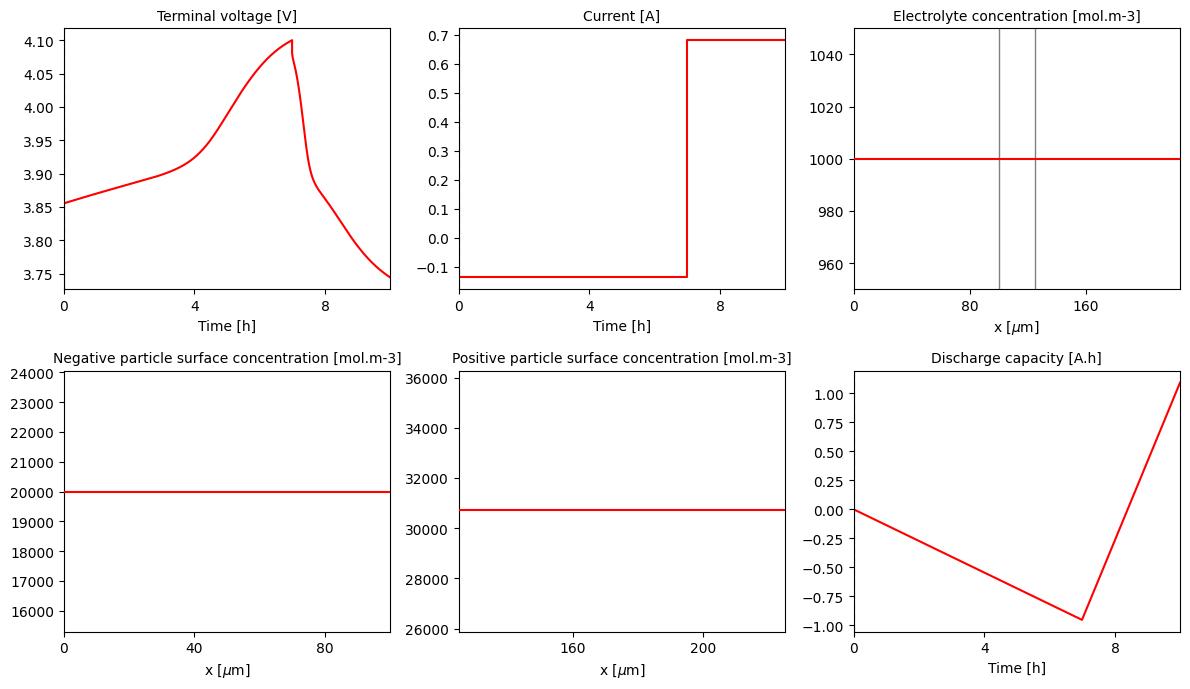

In [11]:
output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    "Electrolyte concentration [mol.m-3]",
    "Negative particle surface concentration [mol.m-3]",
    "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]
sim.plot(output_variables)

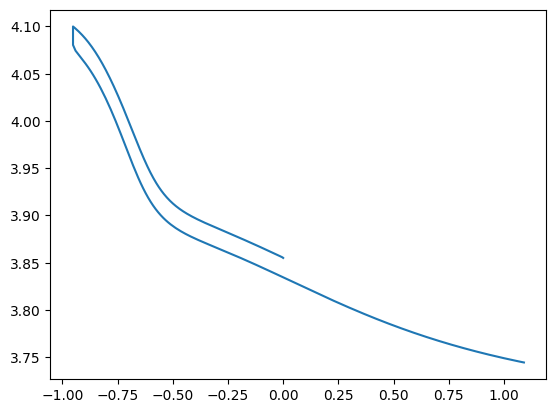

In [12]:
fig, ax = plt.subplots()
solution = sim.solution

dcap = solution["Discharge capacity [A.h]"].data
V = solution['Terminal voltage [V]'].data
ax.plot(dcap, V)

plt.show()

##Add experiment 2 description

In [13]:
experiment = pybamm.Experiment(
    [
        "Charge at C/5 until 4.1 V",
        "Discharge at C/1 until 3.5 V",
        "Rest for 10 minutes",
        "Discharge at C/5 until 3.1 V",
        "Charge at C/1 until 3.5 V"
    ] * 2
)

In [14]:
sim = pybamm.Simulation(model1, experiment=experiment, parameter_values=param1)
sim.solve()

SolverError: ignored

In [ ]:
output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    "Electrolyte concentration [mol.m-3]",
    "Negative particle surface concentration [mol.m-3]",
    "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]
sim.plot(output_variables)

In [ ]:
fig, ax = plt.subplots()
solution = sim.solution

dcap = solution["Discharge capacity [A.h]"].data
V = solution['Terminal voltage [V]'].data
ax.plot(dcap, V)

plt.show()

In [ ]:
max(dcap) - min(dcap)

In [ ]:
max(dcap)

##Add experiment 3 description

In [29]:
experiment = pybamm.Experiment(
    [
        "Discharge at 0.58 A until 3.1 V"
    ] * 1
)

In [30]:
sim = pybamm.Simulation(model1, experiment=experiment, parameter_values=param1)
sim.solve()

interactive(children=(FloatSlider(value=0.0, description='t', max=6.913478806198365, step=0.06913478806198366)…

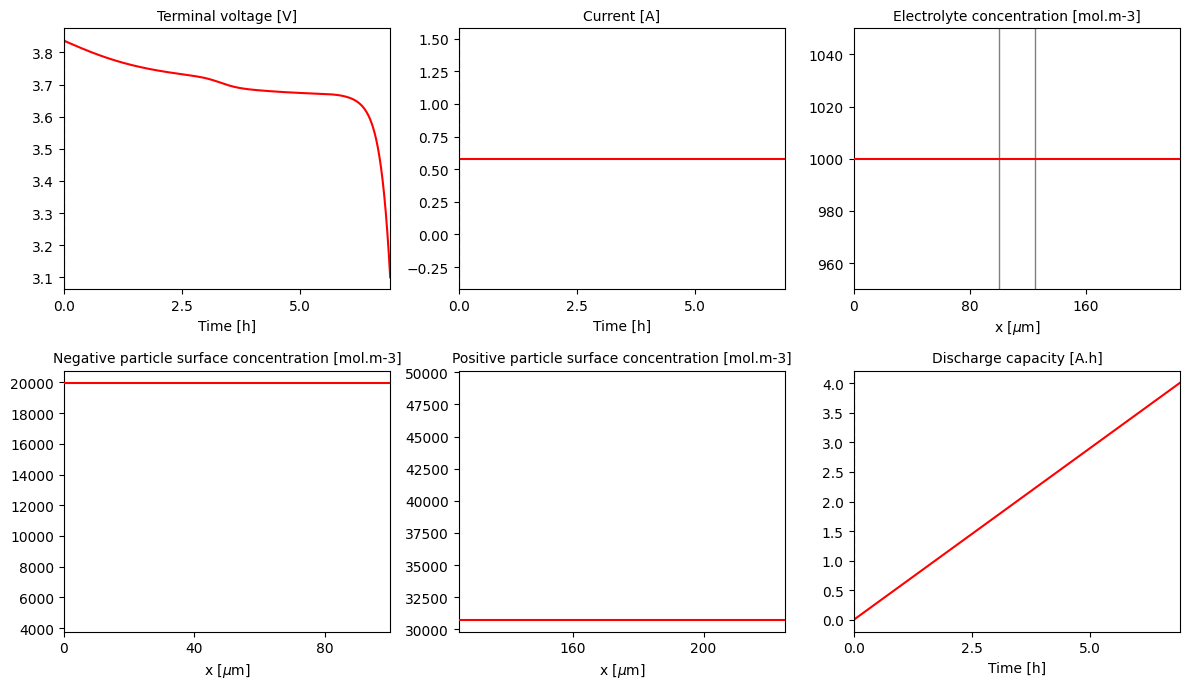

In [31]:
output_variables = [
    "Terminal voltage [V]",
    "Current [A]",
    "Electrolyte concentration [mol.m-3]",
    "Negative particle surface concentration [mol.m-3]",
    "Positive particle surface concentration [mol.m-3]",
    "Discharge capacity [A.h]"
]
sim.plot(output_variables)

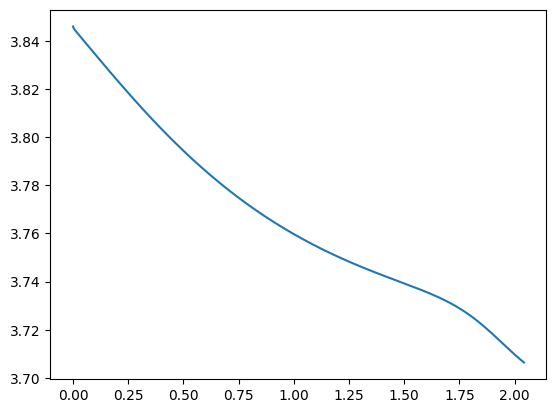

In [18]:
fig, ax = plt.subplots()
solution = sim.solution

dcap = solution["Discharge capacity [A.h]"].data
V = solution['Terminal voltage [V]'].data
ax.plot(dcap, V)

plt.show()